# Magister en Ciencia de Datos - UDD
## DBAnalytics (Ciencia de Datos aplicada)
### Exploración de datos 2:  
El objetivo de este notebook es entender en detalle las caracteristas de los usuarios que suscribieron el servicio de KKBOX, para ello se exploraran todos los dataset disponibles por la empresa.

In [47]:
import graphlab as gl
import numpy as np
import datetime as dt

import seaborn as sns

### Variables auxiliares

In [2]:
gl.canvas.set_target('ipynb')

In [3]:
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to hriverap@gmail.com and will expire on May 19, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1563131729.log


### Exploración de datos:

* Paths que contienen los dataset:

In [4]:
DIR = '/Volumes/LEON/MDS _UDD/kkbox-churn-prediction-challenge/'

#### 1. Dataset - Train:

In [5]:
train = gl.load_sframe(DIR + 'train_sframe')

In [6]:
train.shape

(992931, 2)

In [7]:
train.head(2)

msno,is_churn
waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y= ...,1
QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ= ...,1


* Analisamos distribucion de target

In [8]:
Group = train.groupby(key_columns='is_churn', operations={'count': gl.aggregate.COUNT()})
Group

is_churn,count
0,929460
1,63471


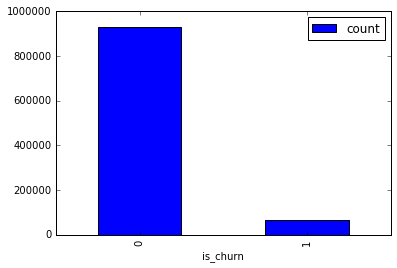

In [9]:
ax = Group.to_dataframe().plot(kind="bar", x="is_churn")
ax.legend(loc=1)

#### 2. Dataset - Members

In [10]:
members_v3 = gl.load_sframe(DIR + 'members_v3_sframe')

In [11]:
members_v3.shape

(6769473, 6)

In [12]:
members_v3.head(2)

msno,city,bd,gender,registered_via,registration_init_time
Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8= ...,1,0,,11,20110911
+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU= ...,1,0,,7,20110914


* Analisamos la distribucion de genero de los miembros

In [13]:
Gender = members_v3.groupby(key_columns='gender', operations={'count': gl.aggregate.COUNT()})

In [14]:
Gender

gender,count
,4429505
male,1195355
female,1144613


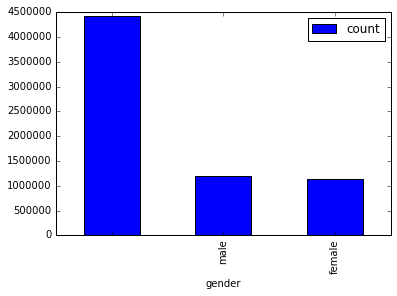

In [15]:
ax = Gender.to_dataframe().plot(kind="bar", x='gender')
ax.legend(loc=1)

* Analizamos el tipo de registro de los miembros del servicio

In [16]:
registered_via = members_v3.groupby(key_columns='registered_via', operations={'count': gl.aggregate.COUNT()}).sort('registered_via', ascending = True)

In [17]:
registered_via

registered_via,count
-1,1
1,43
2,1452
3,1643208
4,2793213
5,3115
6,1213
7,805895
8,3982
9,1482863


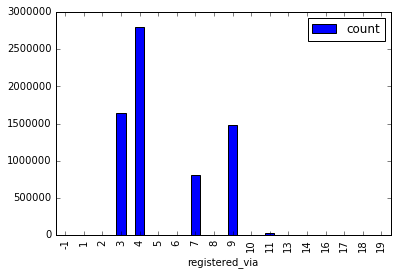

In [18]:
ax = registered_via.to_dataframe().plot(kind="bar", x='registered_via')
ax.legend(loc=1)

* Analizamos la distribucion de edad de los miembros del servicio

In [19]:
bd = members_v3.groupby(key_columns='bd', operations={'count': gl.aggregate.COUNT()})

In [20]:
bd

bd,count
118,2
1029,5
2011,2
-497,1
232,2
49,15697
13,790
60,3441
132,3
-9,1


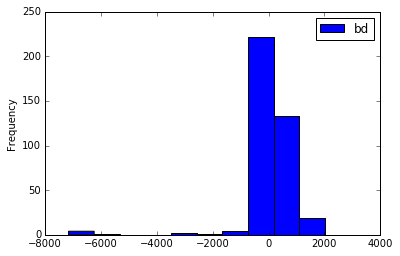

In [21]:
ax = bd.to_dataframe().plot.hist(x="count")
ax.legend(loc=1)

* Analizamos las ciudades

In [22]:
city = members_v3.groupby(key_columns='city', operations={'count': gl.aggregate.COUNT()}).sort('city', ascending = True)

In [23]:
city

city,count
1,4804326
3,27282
4,246848
5,385069
6,135200
7,11610
8,45975
9,47639
10,32482
11,47489


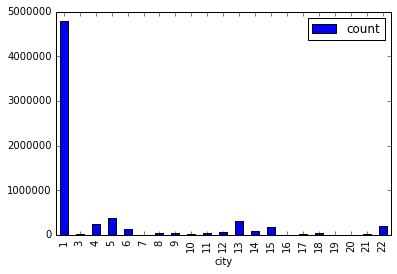

In [24]:
ax = city.to_dataframe().plot(kind="bar", x='city')
ax.legend(loc=1)

* Analizamos fechas de registros

In [25]:
registration_init_time = members_v3.groupby(key_columns='registration_init_time', operations={'count': gl.aggregate.COUNT()}).sort('registration_init_time', ascending = True)

In [26]:
registration_init_time

registration_init_time,count
20040326,250
20040327,1481
20040328,1109
20040329,726
20040330,411
20040331,281
20040401,156
20040402,128
20040403,119
20040404,87


/Users/hrivera/anaconda/envs/gl-env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


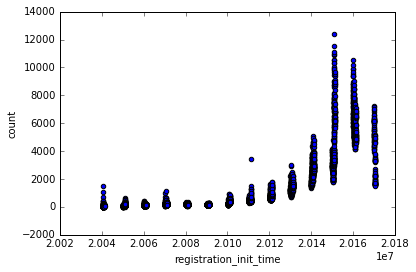

In [27]:
ax = registration_init_time.to_dataframe().plot(kind="scatter", x='registration_init_time', y="count")
ax.legend(loc=1)

### Conclusiones Preliminares 1

* La muestra no se encuentra balanceada, existe una diferencia de mas de 14 veces
* Existen varios outliers en los datasets, tales como: Edad tiene valores negativos y que superan los 100 años.
* La información de genero presenta un alto porcentaje de missing y para la información existe se observa una distribución parecida.
* Los metodos de registro mas usados son: 3, 4, 7 y 9
* Se observa un peak de suscripciones a partir del 2014

### 3. Dataset - Transacciones

In [28]:
transactions = gl.load_sframe(DIR + 'transactions_sframe')

In [29]:
transactions.shape

(21547746, 9)

In [30]:
transactions.head(2)

Columns:
	msno	str
	payment_method_id	int
	payment_plan_days	int
	plan_list_price	int
	actual_amount_paid	int
	is_auto_renew	int
	transaction_date	int
	membership_expire_date	int
	is_cancel	int

Rows: 2

Data:
+-------------------------------+-------------------+-------------------+-----------------+
|              msno             | payment_method_id | payment_plan_days | plan_list_price |
+-------------------------------+-------------------+-------------------+-----------------+
| YyO+tlZtAXYXoZhNr3Vg3+dfVQ... |         41        |         30        |       129       |
| AZtu6Wl0gPojrEQYB8Q3vBSmE2... |         41        |         30        |       149       |
+-------------------------------+-------------------+-------------------+-----------------+
+--------------------+---------------+------------------+------------------------+
| actual_amount_paid | is_auto_renew | transaction_date | membership_expire_date |
+--------------------+---------------+------------------+------------------------+
|        129         |       1       |     20150930     |        20151101        |
|        149         |       1       |     20150930     |        20151031        |
+--------------------+---------------+------------------+------------------------+
+-----------+
| is_cancel |
+-----------+
|     0     |
|     0     |
+-----------+
[2 rows x 9 columns]

* Analizamos renovaciones de suscripciones

In [31]:
is_auto_renew = transactions.groupby(key_columns='is_auto_renew', operations={'count': gl.aggregate.COUNT()})

In [32]:
is_auto_renew

is_auto_renew,count
0,3189796
1,18357950


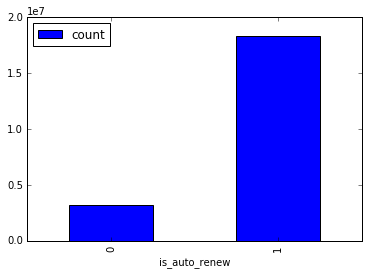

In [33]:
ax = is_auto_renew.to_dataframe().plot(kind="bar", x='is_auto_renew')
ax.legend(loc=2)

* Anazamos las cancelaciones de suscripciones

In [34]:
is_cancel = transactions.groupby(key_columns='is_cancel', operations={'count': gl.aggregate.COUNT()})

In [35]:
is_cancel

is_cancel,count
0,20690895
1,856851


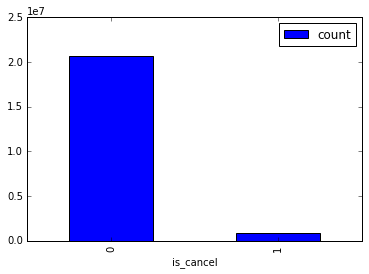

In [36]:
ax = is_cancel.to_dataframe().plot(kind="bar", x='is_cancel')
ax.legend(loc=1)

* Analizamos el metodo de pago

In [37]:
payment_method_id = transactions.groupby(key_columns='payment_method_id', operations={'count': gl.aggregate.COUNT()}).sort('payment_method_id', ascending = True)

In [38]:
payment_method_id

payment_method_id,count
1,12
2,52
3,210
4,15
5,474
6,466
7,1094
8,657
10,1326
11,2129


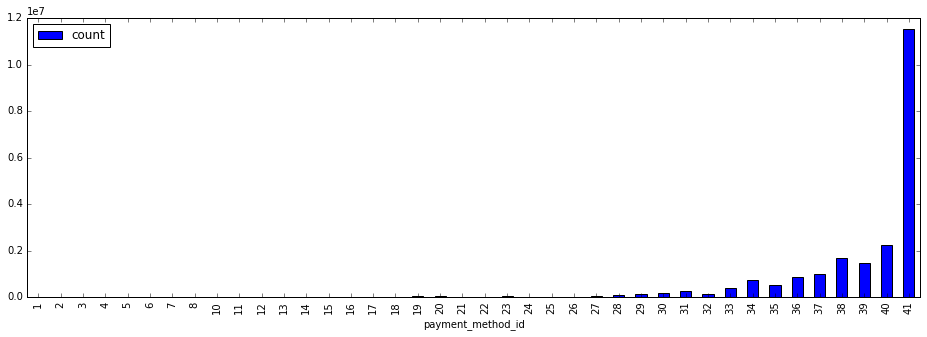

In [39]:
ax = payment_method_id.to_dataframe().plot(kind="bar", x='payment_method_id', figsize=(16,5))
ax.legend(loc=2)

* Analizamos los planes de pago

In [40]:
payment_plan_days = transactions.groupby(key_columns='payment_plan_days', operations={'count': gl.aggregate.COUNT()}).sort('payment_plan_days', ascending = True)

In [41]:
payment_plan_days

payment_plan_days,count
0,870124
1,4759
2,67
3,59
7,577639
10,38216
14,6365
15,21
21,869
30,18956290


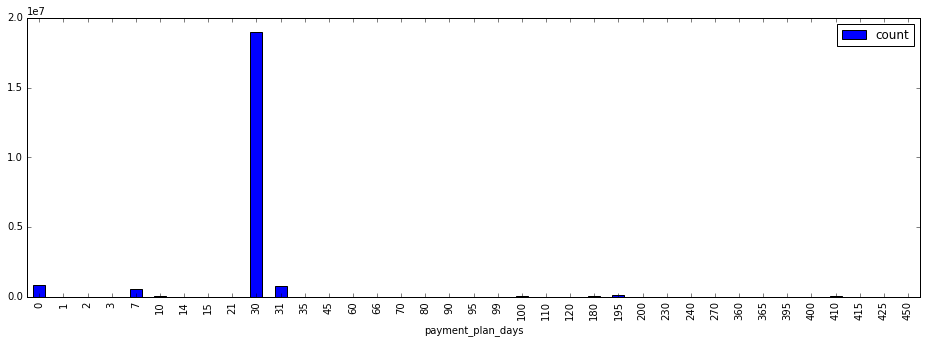

In [42]:
ax = payment_plan_days.to_dataframe().plot(kind="bar", x='payment_plan_days', figsize=(16,5))
ax.legend(loc=1)

* Analizaremos el comportamiento de las transaciones en el tiempo.

In [43]:
transaction_date = transactions.groupby(key_columns='transaction_date', operations={'count': gl.aggregate.COUNT()}).sort('transaction_date', ascending = True)

In [56]:
df = transaction_date.to_dataframe()
df.dtypes

transaction_date    int64
count               int64
dtype: object

In [57]:
df["transaction_date"] = df["transaction_date"].apply(str)

In [66]:
df["month"] = df.transaction_date.str[4:6]
df["year"] = df.transaction_date.str[:4]

In [84]:
del df["transaction_date"]

In [85]:
df.head()

,count,month,year
0,21828,01,2015
1,16357,01,2015
2,16481,01,2015
3,16933,01,2015
4,17730,01,2015


In [100]:
Grp1 = df.groupby(["year","month"]).sum().reset_index()
Grp1

,year,month,count
0,2015,01,576349
1,2015,02,569421
2,2015,03,657379
3,2015,04,595444
4,2015,05,601063
5,2015,06,818903
6,2015,07,697086
7,2015,08,740477
8,2015,09,744636
9,2015,10,716146


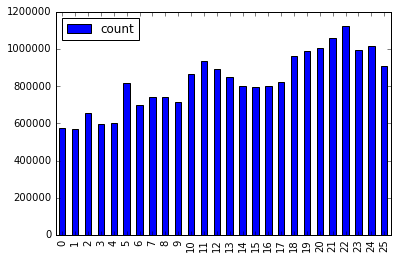

In [109]:
Grp1.plot.bar()

In [105]:
Grp2 = Grp1.pivot("month", "year", "count")
Grp2.head(3)

year,2015,2016,2017
month,,,
01,576349.0,891582.0,1015550.0
02,569421.0,852021.0,908263.0
03,657379.0,801239.0,NaN


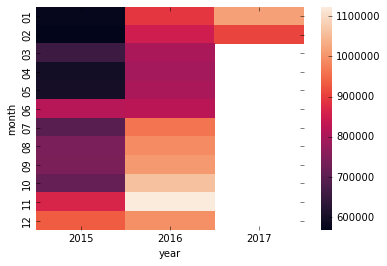

In [106]:
sns.heatmap(Grp2);

*  Analizamos la deferencias de precios

In [112]:
plan_list_price = transactions.groupby(key_columns='plan_list_price', operations={'count': gl.aggregate.COUNT()}).sort('plan_list_price', ascending = True)

In [113]:
plan_list_price

plan_list_price,count
0,1498544
1,113
10,67
15,50
30,6
35,7410
44,1
50,1051
70,250
99,4853433


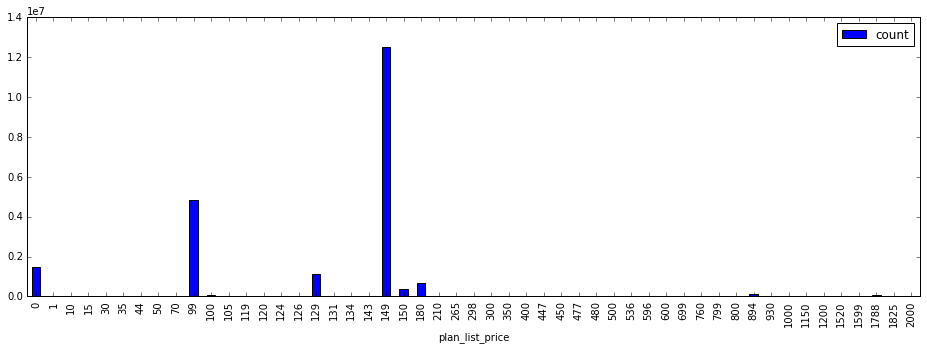

In [114]:
ax = plan_list_price.to_dataframe().plot(kind="bar", x='plan_list_price', figsize=(16,5))
ax.legend(loc=1)

### Conclusiones Preliminares 2

* Dentro de los planes de suscripcioón, el plan de 30 dias es el mas usado
* Dentro de los planes de pago, el metodo 41 es el mas utilizado
* La lista de precio mas utiizado como es la 149
* Noviembre y Dicembre paren ser los meses que presentan mayor numero de transaciones el años 2015, mientras que el 2016 se presento un aumento progresivo a partir de Julio

### 4. Dataset - User Log

In [115]:
user_logs = gl.load_sframe(DIR + 'user_logs_sframe')

In [116]:
user_logs.shape

(392106543, 9)

In [117]:
user_logs.head(2)

msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34= ...,20150513,0,0,0,0,1,1,280.335
rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34= ...,20150709,9,1,0,0,7,11,1658.948


In [120]:
user_logs.show()